# Multiclass SVM 구현

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#IRIS 데이터 로드
iris =  sns.load_dataset('iris') 
X= iris.iloc[:,:4] #학습할데이터
y = iris.iloc[:,-1] #타겟
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [3]:
def standardization(train, test):
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    return train, test

X_train, X_test = standardization(X_train, X_test)

In [4]:
X_train

array([[ 0.78522493,  0.32015325,  0.77221097,  1.04726529],
       [-0.26563371, -1.29989934,  0.0982814 , -0.11996537],
       [ 0.43493872,  0.78302542,  0.94069336,  1.43634218],
       [-0.84944407,  0.78302542, -1.24957775, -1.28719604],
       [-0.38239578, -1.7627715 ,  0.15444219,  0.13941922],
       [ 0.55170079, -0.374155  ,  1.05301496,  0.7878807 ],
       [ 0.31817664, -0.14271892,  0.65988937,  0.7878807 ],
       [ 0.20141457, -0.374155  ,  0.43524618,  0.39880381],
       [-1.66677857, -0.14271892, -1.36189934, -1.28719604],
       [-0.14887164, -0.60559109,  0.21060299,  0.13941922],
       [-0.14887164, -1.06846325, -0.12636179, -0.24965767],
       [ 0.31817664, -0.60559109,  0.15444219,  0.13941922],
       [ 0.66846286, -0.83702717,  0.88453256,  0.91757299],
       [ 0.0846525 , -0.14271892,  0.77221097,  0.7878807 ],
       [-0.49915786, -0.14271892,  0.43524618,  0.39880381],
       [-0.26563371, -0.60559109,  0.65988937,  1.04726529],
       [ 2.18636979,  1.

In [5]:
X_test

array([[-0.14887164, -0.374155  ,  0.26676379,  0.13941922],
       [ 0.31817664, -0.60559109,  0.54756778,  0.00972692],
       [ 0.31817664, -1.06846325,  1.05301496,  0.26911151],
       [-1.5500165 , -1.7627715 , -1.36189934, -1.15750374],
       [ 0.0846525 ,  0.32015325,  0.60372857,  0.7878807 ],
       [ 0.78522493, -0.14271892,  0.99685416,  0.7878807 ],
       [-0.84944407,  1.70876975, -1.24957775, -1.15750374],
       [ 0.20141457, -0.14271892,  0.60372857,  0.7878807 ],
       [-0.38239578,  2.63451409, -1.30573855, -1.28719604],
       [-0.38239578, -1.29989934,  0.15444219,  0.13941922],
       [ 0.66846286,  0.08871717,  0.99685416,  0.7878807 ],
       [-0.38239578,  1.0144615 , -1.36189934, -1.28719604],
       [-0.49915786,  0.78302542, -1.13725615, -1.28719604],
       [ 0.43493872, -0.60559109,  0.60372857,  0.7878807 ],
       [ 0.55170079, -1.7627715 ,  0.37908538,  0.13941922],
       [ 0.55170079,  0.55158933,  0.54756778,  0.52849611],
       [-1.19973028,  0.

## MulticlassSVM(one-to-one)

- __init__ 메서드: 초기화 메서드에서 이진 분류 SVM 모델을 저장할 binary_svms 딕셔너리와 클래스 레이블을 저장할 classes 변수를 설정합니다.

- fit 메서드: 주어진 학습 데이터(X_train, y_train)를 사용하여 각 클래스 쌍에 대한 이진 분류 SVM 모델을 학습시킵니다. 이 때, combinations 함수를 사용해 모든 가능한 클래스 쌍을 생성합니다.

- predict 메서드: 테스트 데이터(X_test)에 대한 예측을 수행합니다. 각 데이터 포인트에 대해 모든 이진 분류 모델의 예측을 수집하고, 가장 많은 투표를 받은 클래스를 최종 예측으로 선택합니다.

In [6]:
from itertools import combinations
from collections import Counter
import numpy as np  # NumPy 추가
from sklearn.svm import SVC  # scikit-learn의 SVC 추가

class MulticlassSVM:
    def __init__(self):
        # 이진 분류 SVM을 저장할 딕셔너리 준비
        self.binary_svms = {}
        # 클래스 레이블을 저장할 변수
        self.classes = None

    def fit(self, X_train, y_train):
        # 유일한 클래스 레이블 찾기
        self.classes = np.unique(y_train)
        
        # 모든 클래스 쌍에 대해 루프 돌기
        for class_1, class_2 in combinations(self.classes, 2):
            # 해당 클래스 쌍에 대한 데이터만 추출
            binary_data = np.isin(y_train, [class_1, class_2])
            X_binary = X_train[binary_data]
            y_binary = y_train[binary_data]
            
            # 레이블을 1과 -1로 변환
            y_binary = np.where(y_binary == class_1, 1, -1)
            
            # 이진 분류 SVM 학습
            binary_svm = SVC(kernel='linear')
            binary_svm.fit(X_binary, y_binary)
            
            # 학습된 모델을 딕셔너리에 저장
            self.binary_svms[(class_1, class_2)] = binary_svm

    def predict(self, X_test):
        # 예측 결과를 저장할 리스트
        predictions = []
        
        # 테스트 데이터에 대해 루프 돌기
        for x in X_test:
            # 클래스별 투표를 저장할 카운터
            class_votes = Counter()
            
            # 저장된 이진 분류 모델로 예측하기
            for (class_1, class_2), binary_svm in self.binary_svms.items():
                decision = binary_svm.predict([x])[0]
                
                # 예측된 클래스 찾기
                predicted_class = class_1 if decision == 1 else class_2
                
                # 클래스별 투표 카운트
                class_votes[predicted_class] += 1
            
            # 가장 많이 투표받은 클래스 찾기
            most_common = class_votes.most_common(1)
            predicted_class = most_common[0][0]
            
            # 최종 예측 결과에 추가
            predictions.append(predicted_class)
        
        # 예측 결과를 NumPy 배열로 반환
        return np.array(predictions)

In [7]:
multiclass_svm = MulticlassSVM()
# 모델 훈련
multiclass_svm.fit(X_train, y_train)

# 예측
y_pred = multiclass_svm.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

## 시각화

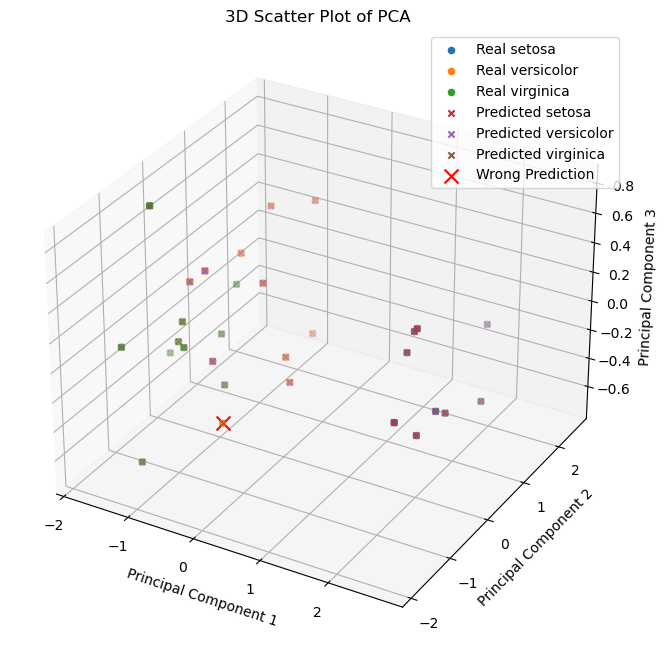

In [9]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA를 사용하여 데이터를 3차원으로 축소
pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(X_test)

# 3D 시각화
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 실제 레이블
for label in np.unique(y_test):
    idx = np.where(y_test == label)
    ax.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], X_test_pca[idx, 2], label=f'Real {label}')

# 예측 레이블
for label in np.unique(y_pred):
    idx = np.where(y_pred == label)
    ax.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], X_test_pca[idx, 2], marker='x', label=f'Predicted {label}')
    
wrong_predictions = y_test != y_pred
ax.scatter(X_test_pca[wrong_predictions, 0], X_test_pca[wrong_predictions, 1], 
           X_test_pca[wrong_predictions, 2], color='red', marker='x', s=100, label='Wrong Prediction')

ax.set_title('3D Scatter Plot of PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()